## Import Libraries and Data

In [55]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/PhD_MasterDataset_OT_initial.csv', firstRow=6, lastRow=12)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_121222_S7-12_run2.csv',t_baseline=25)

C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:84: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (specName,massFrac) in self.massFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:97: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (name,val) in self.volFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:84: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (specName,massFrac) in self.massFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\formulations-prep\PipettingMassBalance.py:97: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (name,val) in self.volFracSeries.iteritems():
C:\Users\ACHI01\Dell_PycharmProjects\for

## Analyse water addition

In [56]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=3)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=64s and ended at t=464s; mass=48.6509g
This equals a volume of 48.748m; expected was 48.891mL; error is 0.292%


## Analyise surfactants

<IPython.core.display.Javascript object>


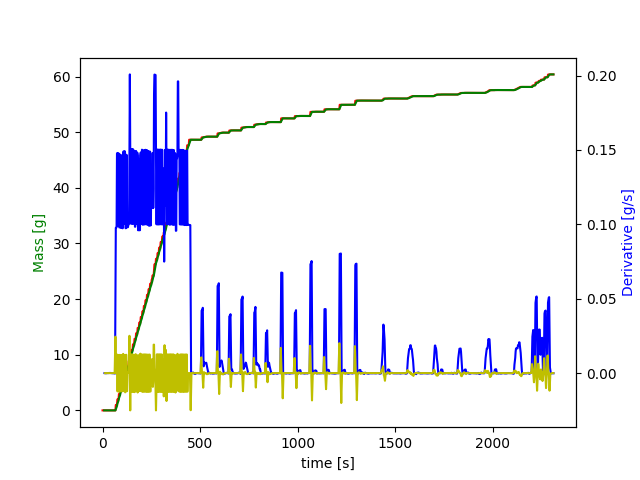

Addition of -0.003g Plantapon LC 7 detected from 464s to 478s - expected volume = 0.652mL and actual volume = -0.003mL (resulting error is 100.406%)
Addition of 0.563g Plantapon LC 7 detected from 502s to 546s - expected volume = 0.736mL and actual volume = 0.531mL (resulting error is 27.872%)
Addition of 0.723g Plantapon LC 7 detected from 584s to 626s - expected volume = 0.292mL and actual volume = 0.681mL (resulting error is 133.355%)
Addition of 0.406g Plantapon LC 7 detected from 644s to 672s - expected volume = 0.565mL and actual volume = 0.382mL (resulting error is 32.317%)
Addition of 0.607g Plantapon LC 7 detected from 706s to 758s - expected volume = 0.425mL and actual volume = 0.573mL (resulting error is 34.867%)
Addition of 0.541g Plantapon LC 7 detected from 772s to 816s - expected volume = 0.273mL and actual volume = 0.51mL (resulting error is 86.448%)
Addition of 0.354g Dehyton PK 45 detected from 832s to 868s - expected volume = 0.675mL and actual volume = 0.337mL (resu

In [58]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=5, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse polyelectrolytes

<IPython.core.display.Javascript object>


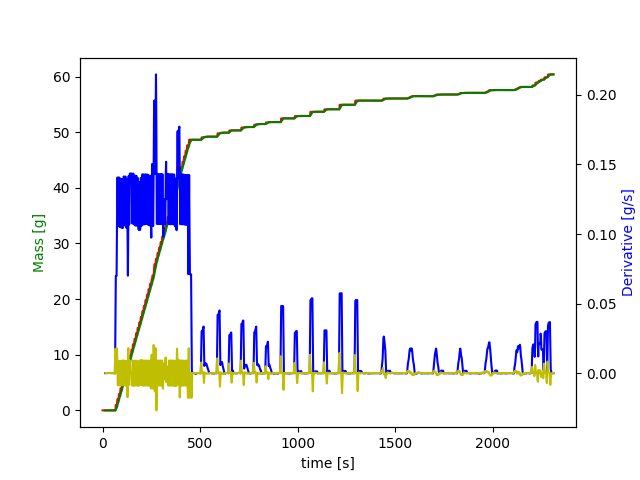

Addition of 0.753g Luviquat Excellence detected from 1290s to 1334s - expected volume = 0.361mL and actual volume = 0.68mL (resulting error is 88.214%)
Addition of 0.386g Luviquat Excellence detected from 1426s to 1482s - expected volume = 0.397mL and actual volume = 0.348mL (resulting error is 12.338%)
Addition of 0.431g Luviquat Excellence detected from 1558s to 1606s - expected volume = 0.252mL and actual volume = 0.388mL (resulting error is 53.852%)
Addition of 0.304g Luviquat Excellence detected from 1692s to 1754s - expected volume = 0.27mL and actual volume = 0.274mL (resulting error is 1.357%)
Addition of 0.306g Luviquat Excellence detected from 1816s to 1874s - expected volume = 0.452mL and actual volume = 0.276mL (resulting error is 38.843%)
Addition of 0.513g Luviquat Excellence detected from 1930s to 2030s - expected volume = 0.514mL and actual volume = 0.463mL (resulting error is 10.0%)


In [59]:
t3 = massProfile.analyseIngredients(avg_window=7, bl_mult=6, mergeSens=7, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

<IPython.core.display.Javascript object>


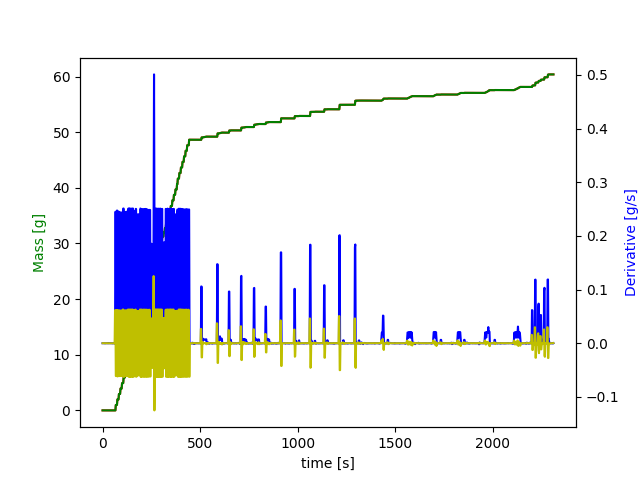

Addition of 0.567g Arlypon TT detected from 2106s to 2148s - expected volume = 0.344mL and actual volume = 0.591mL (resulting error is 71.818%)
Addition of 0.286g Arlypon TT detected from 2198s to 2214s - expected volume = 0.551mL and actual volume = 0.298mL (resulting error is 46.038%)
Addition of 0.514g Arlypon TT detected from 2214s to 2230s - expected volume = 0.249mL and actual volume = 0.534mL (resulting error is 114.167%)
Addition of 0.291g Arlypon TT detected from 2230s to 2244s - expected volume = 0.218mL and actual volume = 0.303mL (resulting error is 38.81%)
Addition of 0.234g Arlypon TT detected from 2244s to 2258s - expected volume = 0.417mL and actual volume = 0.244mL (resulting error is 41.5%)
Addition of 0.418g Arlypon TT detected from 2260s to 2274s - expected volume = 0.531mL and actual volume = 0.435mL (resulting error is 18.039%)


In [60]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=7, mergeSens=2, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [43]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
#actualMassFractions.to_csv('mass_data/AnalaysedComposition_121222_S7-12.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_7408\3261884807.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
30,31.0,0.0,2.878258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.356719,0.0,0.0,3.214953,0.0,0.0,0.0,0.0,4.729863
31,32.0,0.0,6.017820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.649608,0.0,0.0,4.872036,0.0,0.0,0.0,0.0,3.057995
32,33.0,0.0,5.777230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.205091,0.0,0.0,5.036305,0.0,0.0,0.0,0.0,3.419117
33,34.0,0.0,7.681348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.299818,0.0,0.0,5.439288,0.0,0.0,0.0,0.0,2.600126
34,35.0,0.0,4.443057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.081082,0.0,0.0,5.780935,0.0,0.0,0.0,0.0,3.093517
35,36.0,0.0,7.107779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.664188,0.0,0.0,3.236490,0.0,0.0,0.0,0.0,3.868480
